In [1]:
import pandas as pd
import numpy as np
import os
import re 
import plotly as py
import plotly.graph_objs as go
import cv2
import matplotlib.pyplot as plt
import copy
from PIL import Image, ImageOps
from numpy import vstack

https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

In [2]:
path = '../../data/COVID-19_Radiography_Dataset/'

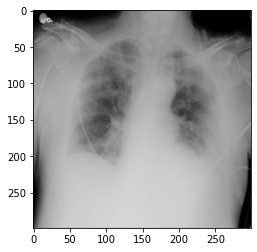

In [3]:
teste = cv2.imread(path+'Covid/COVID-1.png') 
plt.imshow(cv2.cvtColor(teste, cv2.COLOR_BGR2RGB)) 

#### Montando o dataset mapeando as imgs e as classes

In [4]:
list_dir = []
for filename in sorted(os.listdir(path)):
    list_dir.append(path+filename) 

In [5]:
list_dir

['../../data/COVID-19_Radiography_Dataset/Covid',
 '../../data/COVID-19_Radiography_Dataset/Normal',
 '../../data/COVID-19_Radiography_Dataset/ViralPneumonia']

In [8]:
list_dir[0][list_dir[0].find("19_Radiography_Dataset"):].split('/')[1]

'Covid'

In [9]:
list_path = []
list_class = []
for dire in list_dir:
    position = dire.find("19_Radiography_Dataset")
    #path_imgs = sorted(os.listdir(dire))
    #path_imgs = [os.path.join(dire[position:].split('/')[1], x) for x in sorted(os.listdir(dire))]
    path_imgs = [os.path.join(dire, x) for x in sorted(os.listdir(dire))]
    classe = [dire[position:].split('/')[1] for x in path_imgs]
    
    list_path.extend(path_imgs)
    list_class.extend(classe)


In [10]:
df_images = pd.DataFrame(columns=['path', 'class'])
df_images['path'] = pd.Series(list_path)
df_images['class'] = pd.Series(list_class)
df_images = df_images.sample(frac=1).reset_index(drop=True)

df_images

,path,class
0,../../data/COVID-19_Radiography_Dataset/Covid/...,Covid
1,../../data/COVID-19_Radiography_Dataset/Normal...,Normal
2,../../data/COVID-19_Radiography_Dataset/Normal...,Normal
3,../../data/COVID-19_Radiography_Dataset/Normal...,Normal
4,../../data/COVID-19_Radiography_Dataset/Normal...,Normal
...,...,...
15148,../../data/COVID-19_Radiography_Dataset/Covid/...,Covid
15149,../../data/COVID-19_Radiography_Dataset/Normal...,Normal
15150,../../data/COVID-19_Radiography_Dataset/Normal...,Normal
15151,../../data/COVID-19_Radiography_Dataset/Normal...,Normal


<AxesSubplot:>

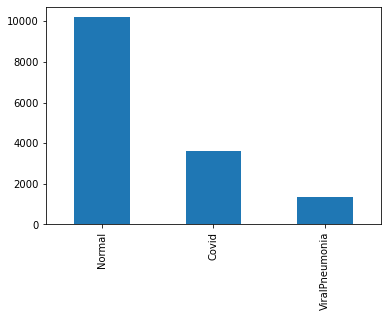

In [11]:
df_images['class'].value_counts().plot(kind='bar')

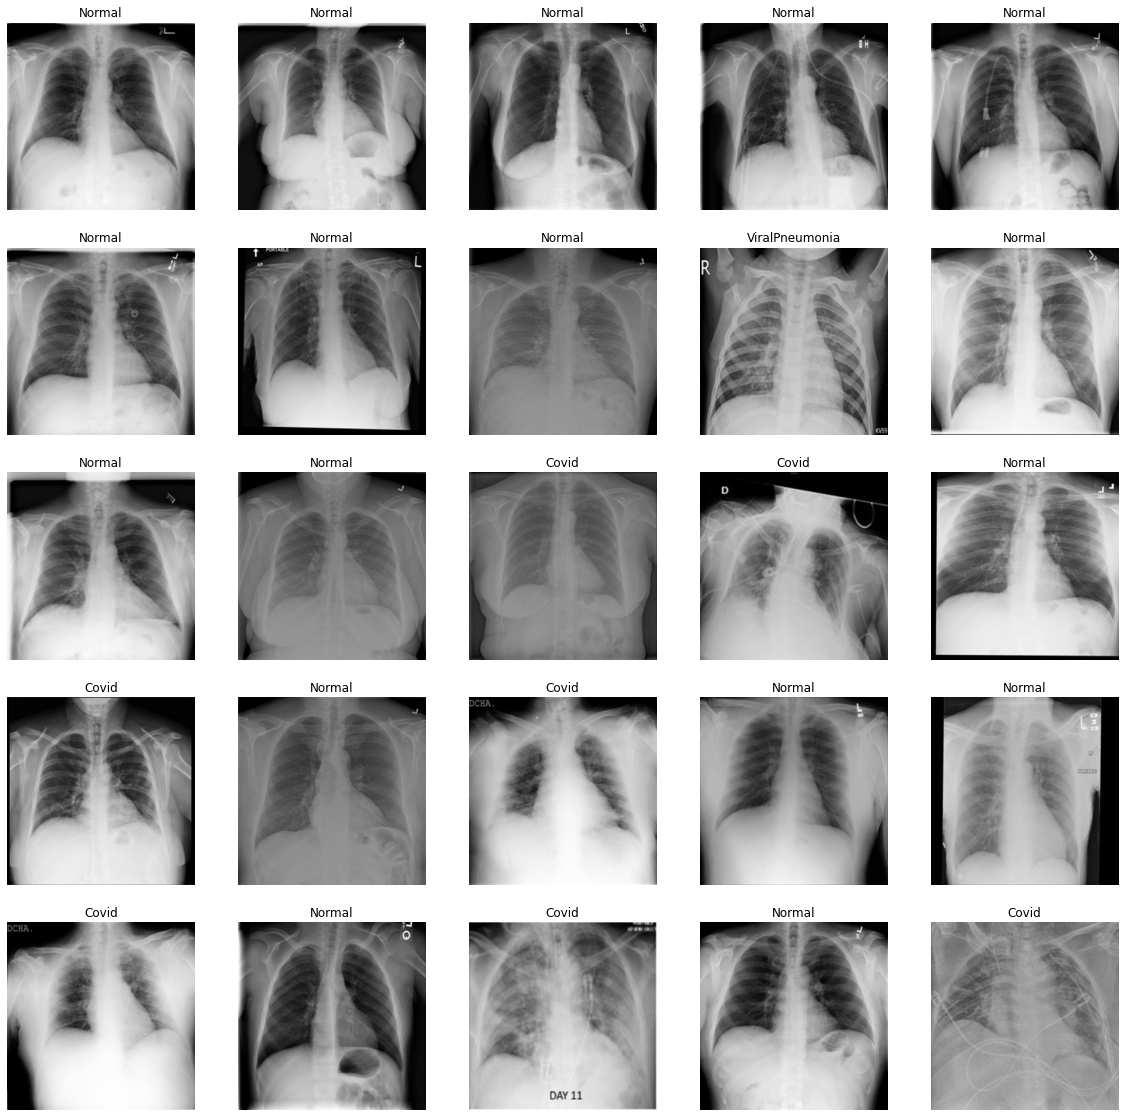

In [12]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,3000,25))): 
    
    imagem=cv2.imread(df_images['path'][i])
    plt.subplot(5,5,n+1)
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title(df_images['class'][i])
    plt.axis('off')     
plt.show()

In [13]:
df_images.to_csv('output/radiography.csv',index=False)